<h1 align=center><font size = 5>Identifying Suitable Areas for a Cycle Shop in London</font></h1>
<h2 align=center><font size = 5>Part 2 - Exploratory Data Analysis</font></h2>

## Introduction

In this notebook we will do some exploratory data analysis to make sure we can use this for modelling in part 3 later

## Notebook Setup


In [1]:
import pandas as pd
import folium

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

import selenium.webdriver
import time

import numpy as np
import seaborn as sns

Matplotlib version:  3.0.3


## Import DataSets

In [2]:
dfLondon = pd.read_csv('dfLondon.csv')
dfCycleShops = pd.read_csv('dfCycleShops.csv')

display(dfLondon.head(5))
display(dfCycleShops.head(5))

Borough   Area  Population  Latitude  Longitude       Radius  \
0  Barking and Dagenham  13.93      194352   51.5607     0.1557  3242.808799   
1                Barnet  33.49      369088   51.6252    -0.1517  5028.093653   
2                Bexley  23.38      236687   51.4549     0.1505  4201.148547   
3                 Brent  16.70      317264   51.5588    -0.2817  3550.618569   
4               Bromley  57.97      317899   51.4039     0.0198  6615.267871   

   Open Routes  In Progress Routes  Planned Routes  Total Routes  Shop Count  \
0           64                  10              23            97           2   
1            0                   0               0             0           9   
2            0                 589               0           589           5   
3          426                   5               0           431           3   
4            0                 286             413           699           2   

   Route/Shop Ratio  Pop Density  
0             48.50     13952.05  
1              0.00     11020.84  
2            117.80     10123.48  
3            143.67     18997.84  
4            349.50      5483.85

Borough  PostalCode Latitude  PostalCode Longitude  \
0  Barking and Dagenham              51.5607                0.1557   
1  Barking and Dagenham              51.5607                0.1557   
2                Barnet              51.6252               -0.1517   
3                Barnet              51.6252               -0.1517   
4                Barnet              51.6252               -0.1517   

                     Shop Name  Shop Latitude  Shop Longitude  
0              The Cycle Store      51.563217        0.117297  
1            Cycles Uk Romford      51.579158        0.181277  
2  Bike and Run (Road, TT etc)      51.590831       -0.164390  
3           NRV Residents' Gym      51.590911       -0.116018  
4        future cycle training      51.587297       -0.132605

## Check for Outliers

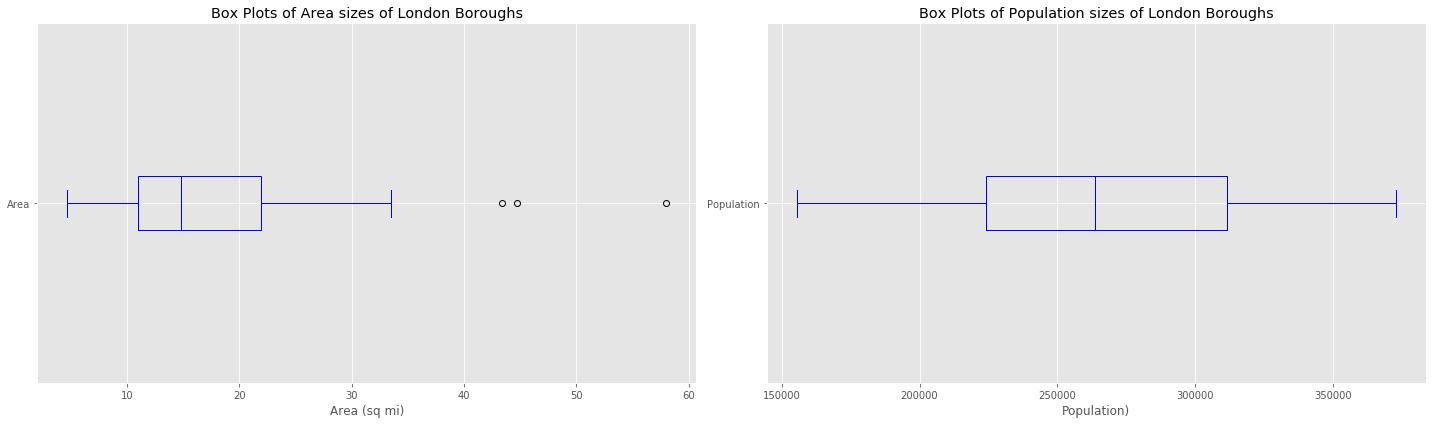

In [3]:
# Check for outliers

fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)


# Subplot 1: Area
dfLondon['Area'].plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Area sizes of London Boroughs')
ax0.set_xlabel('Area (sq mi)')

# Subplot 2: Population
dfLondon['Population'].plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax1) 
ax1.set_title('Box Plots of Population sizes of London Boroughs')
ax1.set_xlabel('Population)')




plt.tight_layout()


Under the Area sizes there are three outliers. Let's identify these...
 

In [4]:
dfLondon.sort_values('Area', ascending=False).head(7)

Borough   Area  Population  Latitude  Longitude       Radius  \
4      Bromley  57.97      317899   51.4039     0.0198  6615.267871   
15  Hillingdon  44.67      286806   51.5441    -0.4760  5807.025869   
14    Havering  43.35      242080   51.5812     0.1837  5720.583583   
1       Barnet  33.49      369088   51.6252    -0.1517  5028.093653   
6      Croydon  33.41      372752   51.3714    -0.0977  5022.084576   
8      Enfield  31.74      320524   51.6538    -0.0799  4894.961110   
2       Bexley  23.38      236687   51.4549     0.1505  4201.148547   

    Open Routes  In Progress Routes  Planned Routes  Total Routes  Shop Count  \
4             0                 286             413           699           2   
15          129                  36             167           332           4   
14            0                   0               0             0           4   
1             0                   0               0             0           9   
6            89                   0             174           263           4   
8           997                 798               0          1795           2   
2             0                 589               0           589           5   

    Route/Shop Ratio  Pop Density  
4             349.50      5483.85  
15             83.00      6420.55  
14              0.00      5584.31  
1               0.00     11020.84  
6              65.75     11156.90  
8             897.50     10098.42  
2             117.80     10123.48

Bromley, Hillingdon and Havering.  Let's see how densely populated these areas are by adding a density column and we can do a box plot to see if these areas are still outliers


Add a density column


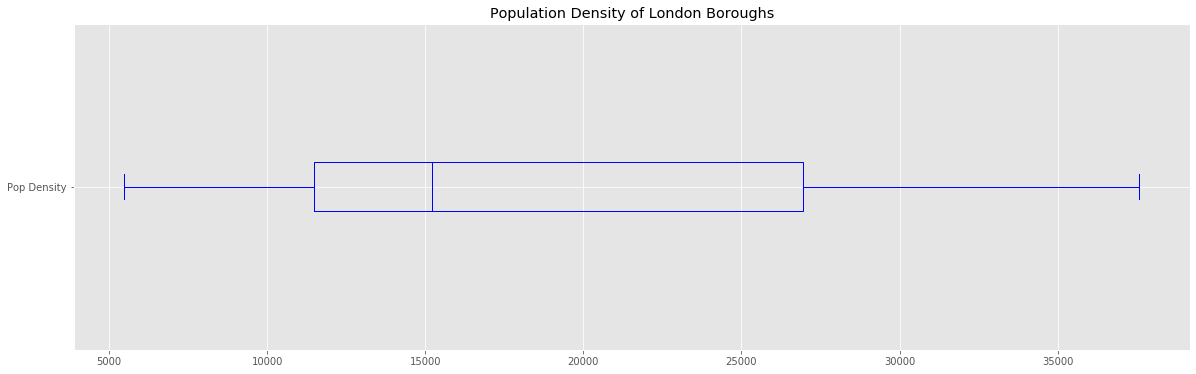

In [5]:
print("\nAdd a density column")
dfLondon['Pop Density'] = round(dfLondon.Population/dfLondon.Area,2)

dfLondon['Pop Density'].plot(kind='box', color='blue', vert=False, figsize=(20, 6))
plt.title('Population Density of London Boroughs')
plt.show()


In this case these are no longer outliers now, so if required I have the option to use density over area in my modelling.

Let's add a map with the data we have currently

## Visualise the data with a map

In [6]:
# This was required to clean the data otherwise the shop markers were not being display on the map
dfCycleShops['Shop Name'] = dfCycleShops['Shop Name'].str.replace("'", "&#39;") 

In [7]:
#import folium

map_geo = r'geoData.json' # geojson file
routes_geo = r'cycleRoutes.json'

# create a plain world map
#display_map = folium.Map(location=[51.410874, -0.291946], zoom_start=10, tiles='Mapbox Bright')
display_map = folium.Map(location=[51.4973,-0.1372], zoom_start=10, tiles='Mapbox Bright')

# generate choropleth map using the population density of each borough
display_map.choropleth(
    geo_data=map_geo,
    data=dfLondon,
    columns=['Borough', 'Pop Density'],
    key_on='feature.properties.name',
    fill_color='GnBu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population Density',
    highlight = True,
    name = 'Borough',
)

# Colour scheme for the three types of cycle routes
# Gray open routes, blue routes in progress and red for planned routes
style_function = lambda x: {
    'weight' : '2',
    'color' : 'Red' if 
    x['properties']['Status'] == 'Planned' else
    'Blue' if 
    x['properties']['Status'] == 'In Progress' else
    'Gray'
}

# Add cycle routes to the map.  Planned routes will be in blue
folium.GeoJson(
    routes_geo,
    name = "Cycle Routes",
    style_function=style_function
).add_to(display_map)

# Add cycle shops to the map
for index, row in dfCycleShops.iterrows():
    folium.Circle(location=[row['Shop Latitude'], row['Shop Longitude']], popup = row['Shop Name'], radius=100).add_to(display_map)

display_map

### Map display for Github

Folium maps do not always display in github so I have added a workaround below.  As this displays as an image the popup labels will not be able to be displayed.

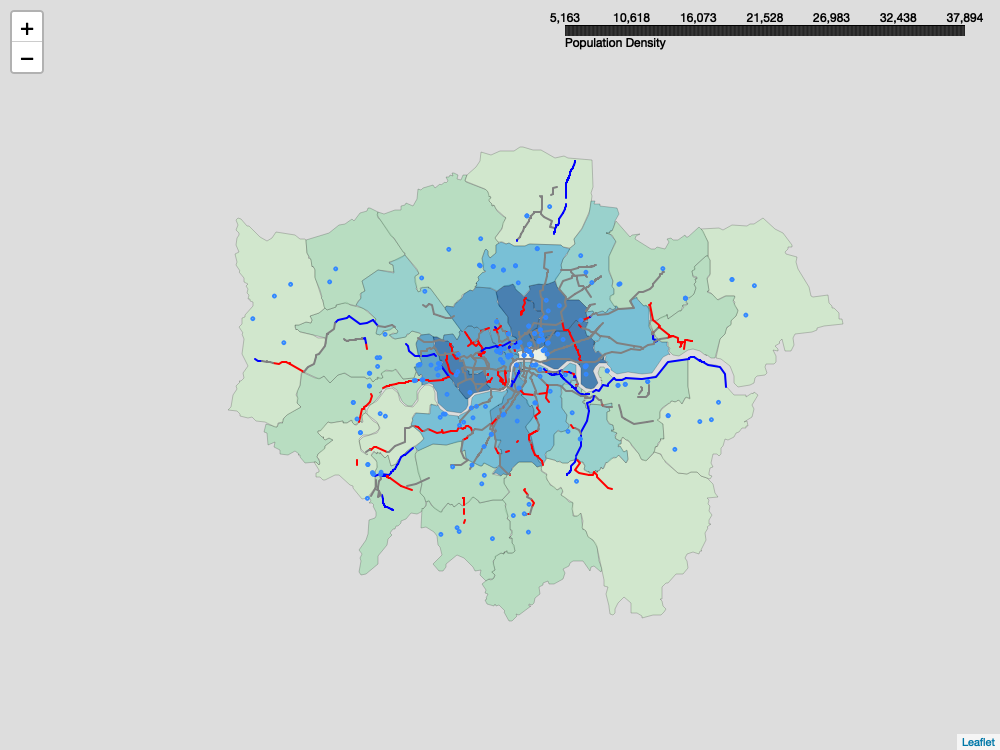

In [8]:
#!conda install -c conda-forge selenium --yes
#import selenium.webdriver
#import time

driver = selenium.webdriver.PhantomJS(executable_path='/Users/moaeedsajid/Downloads/phantomjs-2.1.1-macosx/bin/phantomjs')
driver.set_window_size(1000, 750)  # choose a resolution
display_map.save('display_map.html')
driver.get('display_map.html')
time.sleep(6)
driver.save_screenshot('edaMap.png')

%matplotlib inline
from IPython.display import Image
Image('edaMap.png')

The above map shows the shops by each borough.  I have also addded in the cycle routes with gray showing the currently opened routes, blue for routes that are showing as in progress and red for routes that have been planned by TFL.

The colour of each borough is showing how densely populated it is.  Github may not show the legend very well, but the more densley populated areas are shown in darker shades of blue

## Correlation Matrix


In [15]:
#We don't need these column anymore
dfLondon.drop(columns = ['Latitude','Longitude'], inplace = True)

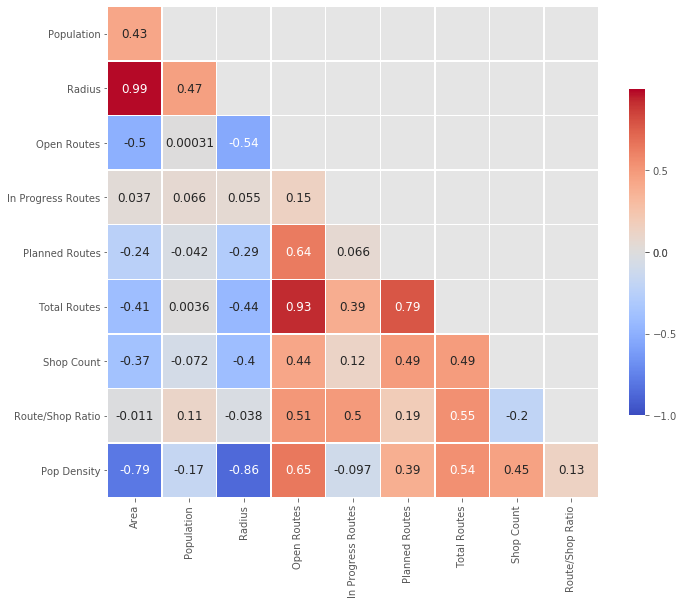

In [47]:
corrMatrix = dfLondon.corr()
dfDummy = pd.get_dummies(dfLondon.Borough)
dfLondonCorr = pd.concat([dfLondon, dfDummy], axis = 1)
mask = np.zeros_like(corrMatrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corrMatrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                      'ticks' : [-1, -.5, 0, 0.5, 0]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(corrMatrix.columns, rotation = 0)
ax.set_xticklabels(corrMatrix.columns)

#Stops the top and bottom being cut-off
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top = 1)
ax.set_xlim(right = +9)


sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [9]:

# Backup latest updates
dfLondon.to_csv (r'dfLondon.csv',index = False, header = True)

### Three Python Notebooks

1. Data Collection and Cleaning - https://github.com/moaeedsajid/Coursera_Capstone/blob/master/Capstone_1.ipynb
2. Exploratory Data Analysis - https://github.com/moaeedsajid/Coursera_Capstone/blob/master/Capstone_2.ipynb
3. Modelling and Results - https://github.com/moaeedsajid/Coursera_Capstone/blob/master/Capstone_3.ipynb